In [4]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import pandas as pd
import time

In [47]:
# 페이지 접속하기
driver = webdriver.Chrome()
driver.get('https://www.jobplanet.co.kr/users/sign_in?_nav=gb')

In [48]:
# 앞서 서버에 요청된 자료가 올 때까지 코드를 지연
driver.implicitly_wait(10)

In [49]:
username = '52100108@dankook.ac.kr'
password = 'kgkg3920691'

In [50]:
# 아이디와 패스워드 입력
driver.find_element(By.XPATH,
                   '//*[@id="user_email"]').send_keys(username)

In [51]:
# 아이디와 패스워드 입력
driver.find_element(By.XPATH,
                   '//*[@id="user_password"]').send_keys(password)

In [52]:
driver.find_element(By.XPATH,
                   '//*[@id="signInSignInCon"]/div[2]/div/section[3]/fieldset/button').click()

In [53]:
# 새로고침 -> 첫 팝업창 제거
driver.refresh()

In [19]:
# 금융감독원 페이지에 접속
driver.get('https://www.jobplanet.co.kr/companies/43469/reviews/%EA%B8%88%EC%9C%B5%EA%B0%90%EB%8F%85%EC%9B%90')

In [20]:
# 팝업창 닫기
popup_closebutton = driver.find_element(By.XPATH, '//*[@id="premiumReviewChart"]/div/div[3]/div[2]/div/div[1]/button')
popup_closebutton.click()

In [21]:
# 띄워진 창의 HTML 태그를 추출
html = BeautifulSoup(driver.page_source)

In [26]:
# 각 구성요소 수집
# 인적요소 수집
hr_data = html.find_all('div', class_='content_top_ty2')
hr_list = [x.get_text() for x in hr_data]

In [29]:
# 한줄평
comment = html.find_all('div', class_='us_label_wrap')
comment_list = [x.get_text() for x in comment]

In [32]:
# 기업 장/단점 / 바라는점
text1 = html.find_all('dl', class_ = 'tc_list')
text_list = [x.get_text() for x in text1]

In [36]:
# 기업추천여부
recommend = html.find_all('p', class_ = 'txt recommend etc_box')
recommend_list = [x.get_text() for x in recommend]

In [40]:
# 도움 버튼 (좋아요 수)
like = html.find_all('a', class_ = 'btn_help helpful btnval_on')
like_list = [x.get_text() for x in like]

In [43]:
# 전체 데이터 수집
hr_list = []
comment_list = []
text_list = []
recommend_list = []
like_list = []

for i in range(0,16):
    try:
        driver.implicitly_wait(10)
        time.sleep(1)
        html = BeautifulSoup(driver.page_source)
        hr_data = html.find_all('div', class_='content_top_ty2')
        comment = html.find_all('div', class_='us_label_wrap')
        text1 = html.find_all('dl', class_ = 'tc_list')
        recommend = html.find_all('p', class_ = 'txt recommend etc_box')
        like = html.find_all('a', class_ = 'btn_help helpful btnval_on')
        
        hr_list = hr_list + [x.get_text() for x in hr_data]
        comment_list = comment_list + [x.get_text() for x in comment]
        text_list = text_list + [x.get_text() for x in text1]
        recommend_list = recommend_list + [x.get_text() for x in recommend]
        like_list = like_list + [x.get_text() for x in like]
    
    except Exception as e:
        print(e)
        
    finally:
        pass
    
    driver.find_element(By.XPATH,
                           '//*[@id="viewReviewsList"]/div/div/div/div/article/a[7]').click()
    time.sleep(1)

ElementClickInterceptedException: Message: element click intercepted: Element <a href="/companies/43469/reviews/%EA%B8%88%EC%9C%B5%EA%B0%90%EB%8F%85%EC%9B%90?page=5" class="btn_pgnext">...</a> is not clickable at point (467, 776). Other element would receive the click: <div class="loading_spinner_bg"></div>
  (Session info: chrome=122.0.6261.112)
Stacktrace:
0   chromedriver                        0x00000001010b853c chromedriver + 3966268
1   chromedriver                        0x00000001010b0ac8 chromedriver + 3934920
2   chromedriver                        0x0000000100d33da0 chromedriver + 277920
3   chromedriver                        0x0000000100d7be68 chromedriver + 573032
4   chromedriver                        0x0000000100d7a3ec chromedriver + 566252
5   chromedriver                        0x0000000100d7856c chromedriver + 558444
6   chromedriver                        0x0000000100d77a9c chromedriver + 555676
7   chromedriver                        0x0000000100d6ce84 chromedriver + 511620
8   chromedriver                        0x0000000100d6c8a8 chromedriver + 510120
9   chromedriver                        0x0000000100daebf0 chromedriver + 781296
10  chromedriver                        0x0000000100d6afb0 chromedriver + 503728
11  chromedriver                        0x0000000100d6ba28 chromedriver + 506408
12  chromedriver                        0x000000010107d724 chromedriver + 3725092
13  chromedriver                        0x0000000101081c18 chromedriver + 3742744
14  chromedriver                        0x000000010106620c chromedriver + 3629580
15  chromedriver                        0x0000000101082714 chromedriver + 3745556
16  chromedriver                        0x0000000101059584 chromedriver + 3577220
17  chromedriver                        0x00000001010a0f74 chromedriver + 3870580
18  chromedriver                        0x00000001010a1118 chromedriver + 3871000
19  chromedriver                        0x00000001010b0738 chromedriver + 3934008
20  libsystem_pthread.dylib             0x000000018769bfa8 _pthread_start + 148
21  libsystem_pthread.dylib             0x0000000187696da0 thread_start + 8


In [45]:
df1 = pd.DataFrame({'인적정보':hr_list, '한줄평':comment_list,
                   '기업세부평가':text_list, '추천여부': recommend_list,
                   '도움점수': like_list})
print(df1.shape)
df1.head()

(20, 5)


인적정보  \
0  \n\n기획/경영\n|\n\n          전직원\n      \n|\n서울\n...   
1  \n\n특수계층/공공\n|\n\n          전직원\n      \n|\n서울...   
2  \n\n특수계층/공공\n|\n\n          현직원\n      \n|\n서울...   
3  \n\n특수계층/공공\n|\n\n          전직원\n      \n|\n서울...   
4  \n\n금융/재무\n|\n\n          현직원\n      \n|\n서울\n...   

                                                 한줄평  \
0  \n\nBEST\n      "부서 by 부서, 팀장 by 팀장으로 근무환경이 달라...   
1  \n\nBEST\n      "과거에 비해 안좋아졌지만 그래도 괜찮은  회사"\n ...   
2  \n\nBEST\n      "여러 장단점이 있긴 한데 장점이 더 많아보입니다."\...   
3  \n\nBEST\n      "대외 인지도에 비해 실제로 느끼는 업무 만족도가 많이...   
4   \n\nBEST\n      "우수한 동료들이 많고 성장할 수 있는 곳"\n    \n   

                                              기업세부평가              추천여부  \
0  \n장점\n\n사람 by 사람이 심하겠지만, 배울 점이 많은 분들 밑에서 일했습니다...     이 기업을 추천 합니다!   
1  \n장점\n\n인력  구성이  훌륭하고  사회에  이바지할  수  있다.\n\n단점...     이 기업을 추천 합니다!   
2  \n장점\n\n우수한 인력, 공공에 기여한다는 자부심, 업무에 대한 경험\n\n단점...  이 기업을 추천하지 않습니다.   
3  \n장점\n\n대외 인지도, 서울 여의도 고정근무(파견 2년 제외), 감독당국으로서...     이 기업을 추천 합니다!   
4  \n장점\n\n- 금융시장 전반을 경험할 수 있고, 우수한 동료들과 일하며 성장할 ...     이 기업을 추천 합니다!   

                도움점수  
0  도움이 돼요\n     0 \n  
1  도움이 돼요\n     0 \n  
2  도움이 돼요\n     0 \n  
3  도움이 돼요\n     0 \n  
4  도움이 돼요\n     0 \n

In [54]:
df1 = pd.read_csv('company.csv')

In [56]:
df1['인적정보']

0     \n\n기획/경영\n|\n\n          전직원\n      \n|\n서울\n...
1     \n\n특수계층/공공\n|\n\n          전직원\n      \n|\n서울...
2     \n\n특수계층/공공\n|\n\n          현직원\n      \n|\n서울...
3     \n\n특수계층/공공\n|\n\n          전직원\n      \n|\n서울...
4     \n\n금융/재무\n|\n\n          현직원\n      \n|\n서울\n...
                            ...                        
75    \n\n특수계층/공공\n|\n\n          현직원\n      \n|\n서울...
76    \n\n교육\n|\n\n          전직원\n      \n|\n서울\n|\n...
77    \n\n전문직\n|\n\n          현직원\n      \n|\n서울\n|\...
78    \n\n서비스/고객지원\n|\n\n          전직원\n      \n|\n광...
79    \n\n기획/경영\n|\n\n          현직원\n      \n|\n서울\n...
Name: 인적정보, Length: 80, dtype: object

In [65]:
def func1(row):
    return row.split('\n')[2].strip() #공백제거

df1['직무'] = df1['인적정보'].apply(func1)
df1['직무'].value_counts()

직무
금융/재무       31
기획/경영       14
미디어/홍보       7
서비스/고객지원     6
특수계층/공공      5
개발           4
법률/법무        4
인사/총무        3
전문직          2
데이터          1
마케팅/시장조사     1
연구개발         1
교육           1
Name: count, dtype: int64

In [67]:
def func2(row):
    return row.split('\n')[5].strip()

df1['재직상태'] = df1['인적정보'].apply(func2)
df1['재직상태'].value_counts()

재직상태
전직원    42
현직원    38
Name: count, dtype: int64

In [71]:
def func3(row):
    return row.split('\n')[8].strip()

df1['근무지'] = df1['인적정보'].apply(func3)
df1['근무지'].value_counts()

근무지
서울    79
광주     1
Name: count, dtype: int64

In [78]:
def func4(row):
    return row.split('\n')[10].split('.')[0].strip()

df1['작성년도'] = df1['인적정보'].apply(func4)

def func5(row) :
    return row.split('\n')[10].split('.')[1].strip()

df1['작성월'] = df1['인적정보'].apply(func5)

In [82]:
def func6(row):
    return row.split('\n')[3].strip()

df1['기업한줄평'] = df1['한줄평'].apply(func6)

In [90]:
def func7(row):
    return row.split('\n')[3].strip()

def func8(row):
    return row.split('\n')[7].strip()

def func9(row):
    return row.split('\n')[11].strip()

df1['기업장점'] = df1['기업세부평가'].apply(func7)
df1['기업단점'] = df1['기업세부평가'].apply(func8)
df1['경영진희망사항'] = df1['기업세부평가'].apply(func9)

In [96]:
# replace 함수를 써도됨
import re
def func10(row):
    if (row.split(' ')[2].strip() == '추천'):
        return '추천'
    else:
        return '비추천'

df1['기업추천여부'] = df1['추천여부'].apply(func10)
df1['기업추천여부'].value_counts()

기업추천여부
추천     61
비추천    19
Name: count, dtype: int64

In [103]:
# 도움점수 -> 정규표현식으로 처리
def func11(row):
    pattern = r'\d+' #한글자이상인숫자찾음
    return int(re.findall(pattern, row)[0])

df1['추천수'] = df1['도움점수'].apply(func11)

In [107]:
df2 = df1.drop(columns=['Unnamed: 0', '인적정보','한줄평','기업세부평가',
                         '추천여부', '도움점수'])
df2.to_csv('24_Data.csv')

In [108]:
df2

직무 재직상태 근무지  작성년도 작성월  \
0      기획/경영  전직원  서울  2024  03   
1    특수계층/공공  전직원  서울  2024  02   
2    특수계층/공공  현직원  서울  2024  01   
3    특수계층/공공  전직원  서울  2024  01   
4      금융/재무  현직원  서울  2023  11   
..       ...  ...  ..   ...  ..   
75   특수계층/공공  현직원  서울  2016  01   
76        교육  전직원  서울  2015  01   
77       전문직  현직원  서울  2015  01   
78  서비스/고객지원  전직원  광주  2014  10   
79     기획/경영  현직원  서울  2014  07   

                                                기업한줄평  \
0                 "부서 by 부서, 팀장 by 팀장으로 근무환경이 달라지는 곳"   
1                         "과거에 비해 안좋아졌지만 그래도 괜찮은  회사"   
2                       "여러 장단점이 있긴 한데 장점이 더 많아보입니다."   
3                 "대외 인지도에 비해 실제로 느끼는 업무 만족도가 많이 떨어짐"   
4                            "우수한 동료들이 많고 성장할 수 있는 곳"   
..                                                ...   
75                           "조직문화가 너무 보수적이고 업무강도 높음"   
76                           "안정적이지만 화려한 미래를 꿈꾸기엔 부족"   
77  "경쟁이 치열하고 개인적인 분위기. 업무에 따라 만족도 천차만별. 2-3년 주기의 ...   
78             "현장실습생으로 근무를 해보았는데 정말 좋은 공기업이라고 생각됩니다"   
79                      "외부에서는 권력기관 정작 내부에서는 불만의 아우성"   

                                                 기업장점  \
0   사람 by 사람이 심하겠지만, 배울 점이 많은 분들 밑에서 일했습니다. 휴게실, 점...   
1                    인력  구성이  훌륭하고  사회에  이바지할  수  있다.   
2                    우수한 인력, 공공에 기여한다는 자부심, 업무에 대한 경험   
3          대외 인지도, 서울 여의도 고정근무(파견 2년 제외), 감독당국으로서의 권한   
4   - 금융시장 전반을 경험할 수 있고, 우수한 동료들과 일하며 성장할 수 있음- 전반...   
..                                                ...   
75  급여나 복지는 동종업계 최고 수준은 아니지만 좋은 편이고 공공을 위해 일한다는 자부...   
76                        대기업 수준의 급여수준, 보람과 자부심, 정년보장   
77                               급여 높은 편이고 업무에 대한 자부심   
78                    업무시간, 부서 분위기, 복지, 실적에 대한 부담이 없음   
79                           금융산업을 위해 무언가를 하고 있다는 자부심   

                                                 기업단점  \
0   사람 by 사람이 심한만큼, 배울 점이 많은 분들만 있는 것은 아니었습니다. 업무량...   
1                 공공기관 특성상 상방의 한계가 뚜렷하고 급여나 복지나 부족하다.   
2            이에 따라가지 못하는 복지, 앞으로 더 안좋아질것으로 보이는 몇몇 요소들   
3   금융권에 비해 현저히 낮은 보수, 전문성 개발의 어려움, 금융위와의 관계로 인한 권...   
4         - 금융감독 업무 자체가 시장에 미치는 영향이 커 업무 수행에 일부 부담 존재   
..                                                ...   
75         조직 문화가 수직적이고 보수적이며 승진이 굉장히 늦고 업무 강도가 너무 높다   
76                            퇴사후 금융사 취업 금지로 이직이 제한적,   
77                            분위기 경쟁적. 치열. 성과평가 제대로안됨   
78           민원상담을 할 때 약간의 어려움이 있을 수도 있습니다. 민원팀에서 근무시   
79                        보고서를 위한 보고서, 홍보를 위한 업무에만 몰두   

                                              경영진희망사항 기업추천여부  추천수  
0                             일하는만큼 상응하는 연봉을 받고 싶습니다.     추천    0  
1                       우수 인력의 이탈을 막기 위해서는 특단의 조치가 필요     추천    0  
2                               좋은 회사가 될 수 있도록 노력해주세요    비추천    0  
3   열심히 일 하고 좋은 성과를 낸 직원에게 충분한 보상이 이뤄지는 인센티브 체계 구축 필요     추천    0  
4                 직원들 처우 개선 및 더 자부심을 갖고 일할 수 있는 환경 조성     추천    0  
..                                                ...    ...  ...  
75           직원들의 불만에 귀기울어줬으면 좋겠고 딱딱한 회사 문화를 바꿔주면 좋겠다    비추천    0  
76                                                        추천   10  
77                   업무 기여 평가가 제대로 되어 그에 따른 보상이 적절해야함     추천    4  
78                            금소원의 분리가 필요하지 않은가 생각됩니다     추천    1  
79   외부에서 보이는 모습만 신경쓰지 말고 진정으로 우리나라 금융산업 발전을 위해서 힘쓰시길    비추천    8  

[80 rows x 11 columns]

### 워드 클라우드 시각화
- 자연어 처리 및 텍스트 마이닝에 사용되는 시각화 기법
- 단어 빈도수를 기반으로 가장 많이 등장하는 단어를 시각화

- KoNLPy (Korea Natural Language Processing Python)
    - Mac : pip install konlpy 
        + https://www.oracle.com/kr/java/technologies/downloads/#jdk21-mac -> 설치
    - Windows:
        1. JAVA 설치 / + JDK

In [4]:
import konlpy

In [10]:
df2 = pd.read_csv('24_Data.csv')

In [14]:
# 형태소 분석기 가져오기 ()
# 형태소 분석 -> 문장을 가진 작은단위 
# (Part of Speech, POS)로 분할하여, 품사부착
okt = konlpy.tag.Okt()

In [17]:
# 1. 문장을 하나의 단어로 Token화 (토크나이징)
# 2. 토큰으로 잘린 형태소에 품사를 부착 (태깅)
text1 = df2['기업한줄평'][0]
pd.DataFrame(okt.pos(text1))

0            1
0      "  Punctuation
1     부서         Noun
2     by        Alpha
3     부서         Noun
4      ,  Punctuation
5      팀         Noun
6      장       Suffix
7     by        Alpha
8      팀         Noun
9      장       Suffix
10    으로         Josa
11    근무         Noun
12    환경         Noun
13     이         Josa
14  달라지는         Verb
15     곳         Noun
16     "  Punctuation

In [28]:
# df1의 기업한줄평을 형태소 분석을 수행한 뒤, 정형데이터로 변환
df_pos = pd.DataFrame()
for i in range(0, len(df2['기업한줄평'])):
    text1 = df2['기업한줄평'][i]
    df_pos = pd.concat([df_pos, pd.DataFrame(okt.pos(text1))])
    
df_pos1 = df_pos.rename(columns={0:'형태소', 1:'품사'})

In [29]:
df_pos1

형태소           품사
0     "  Punctuation
1    부서         Noun
2    by        Alpha
3    부서         Noun
4     ,  Punctuation
..  ...          ...
7   에서는         Josa
8    불만         Noun
9     의         Josa
10  아우성         Noun
11    "  Punctuation

[1480 rows x 2 columns]

In [30]:
# 기업 한줄평에서 단어의 품사가 명사에 해당하는 데이터만 추출
cond1 = (df_pos1['품사']=='Noun')
df_N = df_pos1.loc[cond1]

In [46]:
# 불필요한 단어를 처리 (불용어 제외)
stopword_list = ['곳','수','회사']
cond1 = (df_N['형태소'].isin(stopword_list))
df_N1 = df_N.loc[~cond1]

In [47]:
# 워드클라우드 시각화 라이브러리
#!pip install wordcloud

In [48]:
from wordcloud import WordCloud

In [50]:
wc = WordCloud(background_color='white',
             width=800, height=600,
             font_path='Malgun.ttf').generate(' '.join(df_N1['형태소']))

In [51]:
import matplotlib.pyplot as plt

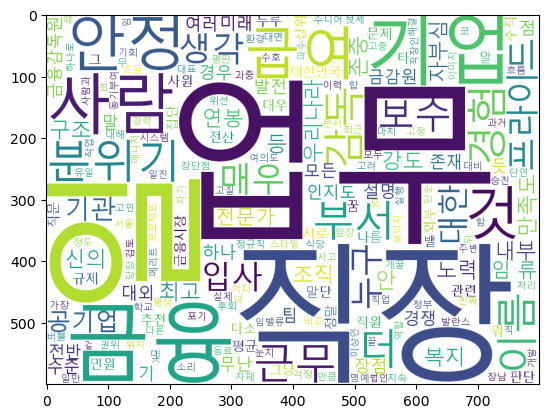

In [52]:
plt.imshow(wc)

In [56]:
p1 = pd.DataFrame(df_N1['형태소'].value_counts().head(10)).reset_index()

In [57]:
import plotly.express as px

In [58]:
px.bar(p1, x='형태소', y='count')

# 개별미션 8주 4일차
- 아래의 미션을 Jupyter Notebook으로 풀이 후, [File] - [Download as]에 [HTML (.html] 로 저장하여 메일로 송부해주세요.
- 제출 양식 : [하나은행_데이터] 홍길동_개별 미션 (8주차 4일)

- **앞서 수집한 '금융감독원' 기업 평가 데이터를 이용해 아래의 분석을 실시하시오.**

1. 기업 평가를 남긴 사원들의 직무 별 기업추천/비추천 비율을 계산하시오.

In [ ]:
df_new = df2[['직무', '기업추천여부']]

In [ ]:
p1 = df_new.pivot_table(index='직무', columns='기업추천여부',
                      aggfunc='size', fill_value=0)

In [70]:
p1['추천 비율'] = p1['추천'] / (p1['추천'] + p1['비추천'])
p1['비추천 비율'] = p1['비추천'] / (p1['추천'] + p1['비추천'])

In [71]:
p1

기업추천여부    비추천  추천     추천 비율    비추천 비율
직무                                   
개발          0   4  1.000000  0.000000
교육          0   1  1.000000  0.000000
금융/재무       8  23  0.741935  0.258065
기획/경영       3  11  0.785714  0.214286
데이터         0   1  1.000000  0.000000
마케팅/시장조사    0   1  1.000000  0.000000
미디어/홍보      1   6  0.857143  0.142857
법률/법무       1   3  0.750000  0.250000
서비스/고객지원    1   5  0.833333  0.166667
연구개발        0   1  1.000000  0.000000
인사/총무       2   1  0.333333  0.666667
전문직         1   1  0.500000  0.500000
특수계층/공공     2   3  0.600000  0.400000

---

2. 실제로 직무에 따른 기업 추천/비추천의 연관성이 있는지 가설검정을 수행하시오.

In [72]:
# 카이제곱검정
from scipy.stats import chi2_contingency

In [73]:
cross1 = pd.crosstab(df2['직무'], df2['기업추천여부'])

In [75]:
# 귀무가설 : 직무에 따라 추천/비추천의 연관이 없다
# 대립가설 : 직무에 따라 추천/비추천의 연관이 있다
chi2_contingency(cross1)[1]
#P.value > 0.05 / 귀무가설 채택
# 직무에 따라 추천/비추천의 연관이 없다

0.8108766454126516

3. 기업을 추천하는 사원들의 데이터만 뽑아, 해당 인원들이 작성한 기업장점 데이터를 워드 클라우드로 시각화 하시오.

In [90]:
import konlpy
import pandas as pd
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
okt = konlpy.tag.Okt()

In [91]:
cond1 = (df2['기업추천여부']=='추천')
df_reco = df2.loc[cond1]

In [95]:
# 형태소 분석기 초기화
okt = Okt()

# 새로운 리스트 생성
pos_list = []

# 형태소 분석 수행 및 리스트에 추가
for text in df_reco['기업장점']:
    pos_result = okt.pos(text)
    pos_list.extend(pos_result)

# 리스트를 DataFrame으로 변환
df_pos = pd.DataFrame(pos_list, columns=['형태소', '품사'])

In [104]:
# 기업장점에서 단어의 품사가 명사에 해당하는 데이터만 추출
cond2 = (df_pos['품사']=='Noun')
df_good = df_pos.loc[cond2]

In [105]:
# 불필요한 단어를 처리 (불용어 제외)
stopword_list = ['무','수','점']
cond3 = (df_good['형태소'].isin(stopword_list))
df_good = df_good.loc[~cond3]

In [106]:
wc = WordCloud(background_color='white',
             width=800, height=600,
             font_path='Malgun.ttf').generate(' '.join(df_good['형태소']))

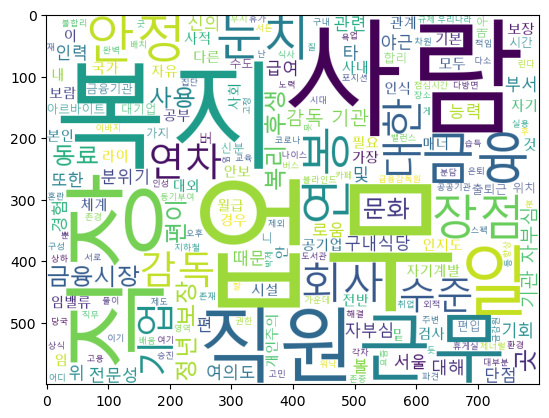

In [107]:
plt.imshow(wc)

----

4. 기업을 추천하지 않는 사원들의 데이터만 뽑아, 해당 인원들이 작성한 기업 단점 데이터를 워드클라우드로 시각화 하시오.

In [108]:
okt = konlpy.tag.Okt()

In [109]:
cond4 = (df2['기업추천여부']=='비추천')
df_notreco = df2.loc[cond4]

In [110]:
# 형태소 분석기 초기화
okt = Okt()

# 새로운 리스트 생성
pos_list = []

# 형태소 분석 수행 및 리스트에 추가
for text in df_notreco['기업단점']:
    pos_result = okt.pos(text)
    pos_list.extend(pos_result)

# 리스트를 DataFrame으로 변환
df_pos1 = pd.DataFrame(pos_list, columns=['형태소', '품사'])

In [111]:
# 기업장점에서 단어의 품사가 명사에 해당하는 데이터만 추출
cond2 = (df_pos1['품사']=='Noun')
df_notgood = df_pos1.loc[cond2]

In [114]:
# 불필요한 단어를 처리 (불용어 제외)
stopword_list = ['위','등','단점']
cond3 = (df_notgood['형태소'].isin(stopword_list))
df_notgood = df_notgood.loc[~cond3]

In [115]:
wc = WordCloud(background_color='white',
             width=800, height=600,
             font_path='Malgun.ttf').generate(' '.join(df_notgood['형태소']))

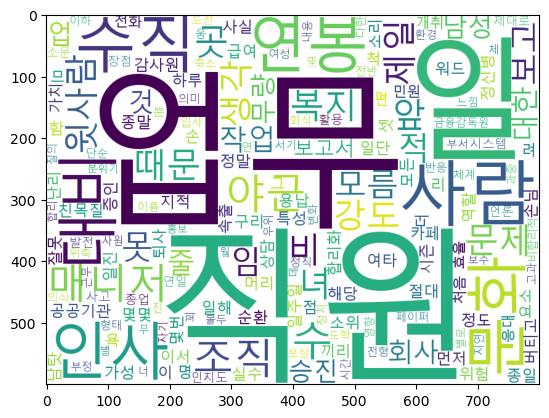

In [116]:
plt.imshow(wc)

-----

5. 추천수를 가장 많이 받은 상위 10개의 데이터를 뽑아, 현직자와 아닌 사원들의 수를 확인하시오.

In [121]:
df_highly_reco = df2.sort_values(by='추천수', ascending=False).head(10)

In [123]:
df_highly_reco['재직상태'].value_counts()

재직상태
현직원    6
전직원    4
Name: count, dtype: int64

-----

6. 경영진에게 바라는 희망사항에서 가장 많이 등장한 명사 5가지를 찾으시오 (관사 및 부사 제외)

In [130]:
okt = konlpy.tag.Okt()

In [136]:
# 형태소 분석기 초기화
okt = Okt()

# 새로운 리스트 생성
pos_list = []

# 형태소 분석 수행 및 리스트에 추가
for text in df2['경영진희망사항']:
    if pd.notnull(text):  # 빈 값이 아닌 경우에만 형태소 분석 수행
        pos_result = okt.pos(text)  # 형태소 분석 수행
        pos_list.extend(pos_result)

# 리스트를 DataFrame으로 변환
df_hope = pd.DataFrame(pos_list, columns=['형태소', '품사'])

In [138]:
# 기업장점에서 단어의 품사가 명사에 해당하는 데이터만 추출
cond2 = (df_hope['품사']=='Noun')
df_hope = df_hope.loc[cond2]

In [157]:
# 불필요한 단어를 처리 (불용어 제외)
stopword_list = ['것','수','위해','더','필요','생각','함','등','좀']
cond3 = (df_hope['형태소'].isin(stopword_list))
df_hope = df_hope.loc[~cond3]

In [158]:
wc = WordCloud(background_color='white',
             width=800, height=600,
             font_path='Malgun.ttf').generate(' '.join(df_hope['형태소']))

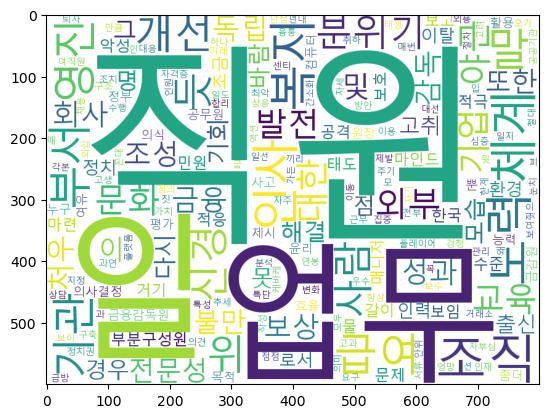

In [159]:
plt.imshow(wc)

In [160]:
p1 = pd.DataFrame(df_hope['형태소'].value_counts().head(10)).reset_index()

In [161]:
px.bar(p1, x='형태소', y='count')

----

- **외부 데이터 크롤링 관한 문제 입니다.**

7. 네이버에 '하나은행'과 관련된 뉴스 기사를 검색하여, 상위 10개의 뉴스 기사의 제목과 내용을 수집해, 워드클라우드로 시각화 하시오 (제목,내용 구분없이 한번에 시각화)

In [1]:
import requests

In [2]:
url = 'https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query=%ED%95%98%EB%82%98%EC%9D%80%ED%96%89'
response = requests.get(url)

In [5]:
soup = BeautifulSoup(response.text, 'html.parser')

# 제목 뽑아내기
a_tags = soup.find_all('a', class_='news_tit')

titles = []
for a_tag in a_tags:
    title = a_tag.get('title')
    if title:
        titles.append(title)

In [182]:
titles

["하나은행, '2024 대전하나시티즌' 홈경기 예매 서비스 오픈",
 "독일 하나은행, 무디스 국제신용등급 'Aa3' 획득",
 "하나은행, '2024 대전하나시티즌 홈경기' 예매 서비스 오픈",
 "獨 하나은행, 무디스 국제신용등급 'Aa3' 획득",
 '독일 하나은행, 무디스 국제신용등급 ‘Aa3’ 획득',
 '"거래은행 바꾸고, 오픈런도" 임영웅 화력에 하나은행 활짝m금융톡]',
 '[게시판] 무보-하나은행, 해외 미수채권 회수 지원 협약',
 "하나은행, 무역보험공사와 '해외 미수채권 회수지원' 협력",
 "'하나은행 앱' 신규 전세대출 5주 넘게 중단…왜?",
 '[포토] "하나은행은 임대 보증금 반환하라"']

In [183]:
a_tags = soup.find_all('a', class_='api_txt_lines dsc_txt_wrap')

# 결과를 저장할 리스트 초기화
previews = []

# 각 <a> 태그에서 미리보기 내용 추출하여 리스트에 저장
for a_tag in a_tags:
    preview = a_tag.get_text(strip=True)
    previews.append(preview)

In [187]:
previews

["하나은행은 모바일 앱인 '하나원큐'를 통해 프로축구단 '대전하나시티즌'의 2024 정규리그 홈경기 예매 서비스를 시작한다고 7일 밝혔다. 예매는하나원큐 앱 로그인 후 '스포츠·문화' 카테고리의 티켓예매 메뉴에서 가능하다. 시즌권 구매는 이날 오후 1시, 일반 예매는 8일 오후 1시부터 가능하다. 특히...",
 "하나은행은 독일 현지법인 '독일하나은행'이 글로벌 3대 신용평가사 중하나인 무디스(Moody's)로부터 국제신용등급 'Aa3' 등급을 획득했다고 6일 밝혔다.하나은행이 100% 출자한 자회사 독일하나은행은 지난 1970년부터 독일 프랑크푸르트에서 유럽에 진출한 한국계 기업과 현지 기업을 대상으로 기업금융...",
 "사진=하나은행 하나은행(은행장 이승열)은 은행 대표 모바일 앱인 '하나원큐'를 통해 K1리그1 프로축구단 '대전하나시티즌'의 2024 정규리그 홈경기 예매 서비스를 7일 13시부터 순차적으로 오픈한다고 7일 밝혔다. 『2024 대전하나시티즌 홈경기』 예매는 '하나원큐' 앱 로그인 후 '스포츠/문화' 카테고리의...",
 "100% 자회사…유럽 진출 '한국계 은행' 최초 아주경제=김수지 기자 sujiq@ajunews.com 하나은행 간판 [사진=하나은행]하나은행독일 현지법인이 우량한 신용등급을 획득하며 유럽 시장에서 경쟁력을 강화하고 있다. 하나은행은 '독일 하나은행'이 글로벌 3대 신용평가사인 무디스에서 국제신용등급 ‘Aa3’를...",
 '하나은행은 독일 현지법인 독일하나은행이 글로벌 3대 신용평가사 중하나인 무디스로부터 국제신용등급 ‘Aa3’ 등급을 획득했다고 6일 밝혔다.하나은행이 100% 출자한 자회사 독일하나은행은 지난 1970년부터 유럽의 금융 중심지인 독일 프랑크푸르트에서 유럽에 진출한 한국계 기업과 현지 기업을...',
 '"임영웅 때문에 10년 넘게 거래하던은행에서하나은행으로 갈아탔어요."하나금융그룹이 지난달 23일 가수 임영웅을 모델로 섭외하면서 그 효과를 제대로 누리고 있다. 2주밖에 되지 않았는데도 임영웅의 팬들은

In [188]:
# 데이터프레임 생성
df = pd.DataFrame({'제목': titles, '미리보기 내용': previews})

# 기사내용 파생 변수 추가
df['기사내용'] = df['제목'] + ': ' + df['미리보기 내용']

### 워드클라우드 시각화

In [189]:
# 형태소 분석기 초기화
okt = Okt()

# 새로운 리스트 생성
pos_list = []

# 형태소 분석 수행 및 리스트에 추가
for text in df['기사내용']:
    if pd.notnull(text):  # 빈 값이 아닌 경우에만 형태소 분석 수행
        pos_result = okt.pos(text)  # 형태소 분석 수행
        pos_list.extend(pos_result)

# 리스트를 DataFrame으로 변환
df_news = pd.DataFrame(pos_list, columns=['형태소', '품사'])

In [190]:
# 기업장점에서 단어의 품사가 명사에 해당하는 데이터만 추출
cond2 = (df_news['품사']=='Noun')
df_news = df_news.loc[cond2]

In [191]:
wc = WordCloud(background_color='white',
             width=800, height=600,
             font_path='Malgun.ttf').generate(' '.join(df_news['형태소']))

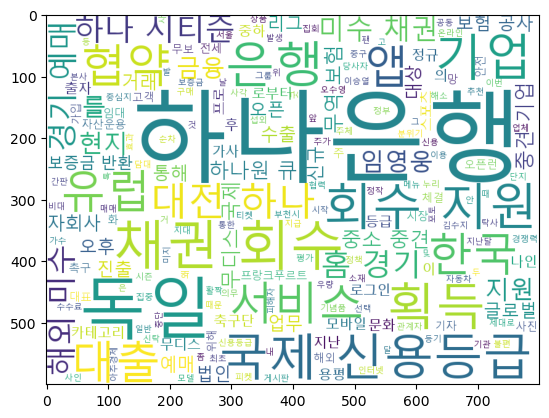

In [192]:
plt.imshow(wc)

-----

8. 네이버 금융에서 금일 급상승한 주식 종목을 찾고, 블로그에 자동 포스팅하는 프로그램을 만드시오.
(코드를 한번 실행하면, 데이터 수집 및 자동 포스팅이 모두 한번에 이뤄져야함)

In [215]:
import pyautogui
import pyperclip
from PIL import Image

In [381]:
'''
# 코스피 데이터 수집
url = 'https://finance.naver.com/sise/sise_rise.naver?sosok=0'
url_get = requests.get(url)
html = BeautifulSoup(url_get.text)

html.find('td', class_='pgRR').find('a') # 맨 뒷페이지로 가는 버튼
df_table_KOSPI = pd.read_html(url_get.text)[1]
df_table_KOSPI.to_csv('df_table_KOSPI.csv')
# 코스닥 데이터 수집
url = 'https://finance.naver.com/sise/sise_rise.naver?sosok=1'
url_get = requests.get(url)
html = BeautifulSoup(url_get.text)

df_table_KOSDAQ = pd.read_html(url_get.text)[1]
df_table_KOSDAQ.to_csv('df_table_KOSDAQ.csv')
'''
###############################################
# 네이버 화면에서 왼쪽 메뉴
a = (39, 197)
pyautogui.moveTo(a)
time.sleep(1)
pyautogui.click(clicks=2)

# 로그인 누르기
b = (47, 327)
pyautogui.moveTo(b)
time.sleep(1)
pyautogui.click(clicks=2)

c = (420, 325)
pyautogui.moveTo(c)
time.sleep(1)
pyautogui.click()

#아이디 입력
f=(428,445)
pyautogui.moveTo(f)
time.sleep(1)
pyautogui.click()
pyperclip.copy('shl4000') # 해당 문자를 복사
pyautogui.hotkey('command','v')

#비밀번호 입력
g=(424,491)
pyautogui.moveTo(g)
time.sleep(1)
pyautogui.click(clicks=2)
pyperclip.copy('******')
pyautogui.hotkey('command','v')

# 로그인 (엔터)
time.sleep(1)
pyautogui.write(['enter'])
##############################################
#네이버 왼쪽 메뉴 창 다시 클릭
a = (39, 197)
time.sleep(2)
pyautogui.moveTo(a)
time.sleep(1)
pyautogui.click()

# 블로그 입장이요
time.sleep(1)
h=(64,473)
pyautogui.moveTo(h)
time.sleep(1)
pyautogui.click(clicks=2)

# 내 프로필 클릭
time.sleep(1)
a2 = (833,189)
pyautogui.moveTo(a2)
time.sleep(1)
pyautogui.click(clicks=2)

# 내 블로그 입장
time.sleep(1)
a3 = (828, 354)
pyautogui.moveTo(a3)
time.sleep(1)
pyautogui.click(clicks=2)

# 글쓰기 누르기
a4=(126,706)
pyautogui.moveTo(a4)
time.sleep(1)
pyautogui.click(clicks=2)

##################################################
# 제목쓰기
a5=(245,418)
pyautogui.moveTo(a5)
time.sleep(1)
pyautogui.click(clicks=2)

# 검색창에 글을 입력
pyperclip.copy('오늘의 주식정보 알아가세요~^^') # 해당 문자를 복사
pyautogui.hotkey('command','v')
# 키보드 상의 입력값을 실행

# 본문 작성
a7 = (271, 525)
pyautogui.moveTo(a7)
time.sleep(1)
pyautogui.click(clicks=2)

# 본문에 글을 입력
pyperclip.copy('#오주추 #오늘의주식추천 #오급주 #오늘급상승한주식') 
pyautogui.hotkey('command', 'v')

# 데이터프레임에서 상위 10개의 데이터 추출
df_top_10_KOSPI = df_table_KOSPI.head(10)
df_top_10_KOSPI.to_excel('df_top_10_KOSPI.xlsx', index=False)

time.sleep(1)
pyautogui.write(['enter'])

##################################
pyperclip.copy('KOSPI')
pyautogui.hotkey('command', 'v')

time.sleep(1)
pyautogui.write(['enter'])

df_top_10_KOSPI_str = df_top_10_KOSPI.to_csv(index=False, sep='\t')
pyperclip.copy(df_top_10_KOSPI_str)

time.sleep(2)
pyautogui.hotkey('command', 'v')

##################################
pyautogui.write(['enter'])
pyautogui.write(['enter'])

time.sleep(1)
pyperclip.copy('KOSDAQ')
pyautogui.hotkey('command', 'v')

time.sleep(1)
pyautogui.write(['enter'])  # 엔터키

# 데이터프레임에서 상위 10개의 데이터 추출
df_top_10_KOSDAQ = df_table_KOSDAQ.head(10)
df_top_10_KOSDAQ.to_excel('df_top_10_KOSDAQ.xlsx', index=False)

df_top_10_KOSDAQ_str = df_top_10_KOSDAQ.to_csv(index=False, sep='\t')
pyperclip.copy(df_top_10_KOSDAQ_str)

time.sleep(1)
pyautogui.hotkey('command', 'v')

# 본문에 글을 입력
time.sleep(0.5)
pyperclip.copy('\n\n\n그럼 안녕~~')  # 해당 문자를 복사
pyautogui.hotkey('command', 'v')
#########################################################
# 발행 버튼
a8=(1063, 182)
pyautogui.moveTo(a8)
tivme.sleep(1)
pyautogui.click(clicks=2)

#비공개로 올릴래.. 
a9=(1027, 338)
pyautogui.moveTo(a9)
time.sleep(1)
pyautogui.click(clicks=2)

#발행!
a10 =(1035, 722)
pyautogui.moveTo(a10)
time.sleep(1)
pyautogui.click(clicks=2)

NameError: name 'tivme' is not defined